In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
%config InlineBackend.figure_fornat = 'retina'
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',2000)

In [2]:
#read multiple file
import os
import glob
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/spectrum400pic_Xfixed/'
read_file = glob.glob(os.path.join(fpath,"*.npy"))
np_array = []
for file in read_file:
    data = np.load(file)
    np_array.append(data)

In [8]:
data = np.load('all_processed_data.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

X
[[-0.00864469  0.0006357   0.01244438 ...  0.20125262  0.24801245
   0.22432554]
 [ 0.0018402   0.00993099  0.02183564 ...  0.37911781  0.43591616
   0.46893506]
 [ 0.13422352  0.13921366  0.14955479 ...  0.18717591  0.15615716
   0.12713   ]
 ...
 [ 0.05029795  0.06236732  0.0761603  ...  0.30991094  0.30719812
   0.26446351]
 [ 0.0201164   0.03192383  0.04508201 ...  0.27126067  0.22192419
   0.22990213]
 [ 0.01482185  0.02738802  0.04101932 ...  0.22819835  0.19387345
   0.19890692]]
y
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 ...
 [0.06008469 0.65929652 0.28061879]
 [0.34946664 0.36030602 0.29022734]
 [0.31033173 0.50012997 0.1895383 ]]


In [9]:
X = np.array(np_array)
X.shape

(400, 64, 64)

In [10]:
y = data['y']
y.shape

(400, 3)

In [33]:
for i in range(0,399,1):
    np_convert = np_array[i].flatten()

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(320, 64, 64)
(320, 3)
(80, 3)
(80, 64, 64)


In [35]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)

(655360, 1)


In [36]:
print(X_train)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [17]:
print(X_train)
print(y_train)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [9]:
from sklearn.linear_model import LogisticRegression,Lasso,ElasticNet,LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [16]:
#Round 1
names=[]
train_scores =[]
test_scores =[]

models={'LogisticRG': LogisticRegression(),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'ElasticN': ElasticNet(),
       'GBReg': GradientBoostingRegressor(),
       'RandomF' : RandomForestRegressor(),
       'LinearREG' : LinearRegression(),
       'SVR' : SVR()};

for name,model in models.items():
    name_model = model
    name_fit = name_model.fit(X_train, y_train);
    name_pred = name_model.predict(X_test);
    name_train_score = name_model.score(X_train, y_train).round(4);
    name_test_score = name_model.score(X_test, y_test).round(4);
    names.append(name)
    train_scores.append(name_train_score);
    test_scores.append(name_test_score);
    print(f'R2 score of {name} : ', r2_score(y_test,name_pred))
    print(f'MSE of {name} : ',mean_squared_error(y_test,name_pred));

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-16-ef4abc6beeb0>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  name_fit = name_model.fit(X_train, y_train);


R2 score of LogisticRG :  -0.053984575835475335
MSE of LogisticRG :  0.05121951219512195
R2 score of Ridge :  -0.0013806168713244027
MSE of Ridge :  0.04866316632493665
R2 score of Lasso :  -0.000782750760442319
MSE of Lasso :  0.048634112379310264
R2 score of ElasticN :  -0.000782750760442319
MSE of ElasticN :  0.048634112379310264
R2 score of GBReg :  -0.0013915164931384005
MSE of GBReg :  0.048663696003762344
R2 score of RandomF :  -0.0008655991028523324
MSE of RandomF :  0.04863813848346938
R2 score of LinearREG :  -0.0013915370758752488
MSE of LinearREG :  0.04866369700400253
R2 score of SVR :  -0.04896560166483077
MSE of SVR :  0.05097560975609759


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
#Round 2 test
names=[]
train_scores =[]
test_scores =[]

models={'LogisticRG': LogisticRegression(),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'ElasticN': ElasticNet(),
       'GBReg': GradientBoostingRegressor(),
       'RandomF' : RandomForestRegressor(),
       'LinearREG' : LinearRegression(),
       'SVR' : SVR()};

for name,model in models.items():
    name_model = model
    name_fit = name_model.fit(X_train, y_train);
    name_pred = name_model.predict(X_test);
    name_train_score = name_model.score(X_train, y_train).round(4);
    name_test_score = name_model.score(X_test, y_test).round(4);
    names.append(name)
    train_scores.append(name_train_score);
    test_scores.append(name_test_score);
    print(f'R2 score of {name} : ', r2_score(y_test,name_pred))
    print(f'MSE of {name} : ',mean_squared_error(y_test,name_pred));

ValueError: Found array with dim 3. Estimator expected <= 2.

In [17]:
#Round 3 test
names=[]
train_scores =[]
test_scores =[]

models={'LogisticRG': LogisticRegression(),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'ElasticN': ElasticNet(),
       'GBReg': GradientBoostingRegressor(),
       'RandomF' : RandomForestRegressor(),
       'LinearREG' : LinearRegression(),
       'SVR' : SVR()};

for name,model in models.items():
    name_model = model
    name_fit = name_model.fit(X_train, y_train);
    name_pred = name_model.predict(X_test);
    name_train_score = name_model.score(X_train, y_train).round(4);
    name_test_score = name_model.score(X_test, y_test).round(4);
    names.append(name)
    train_scores.append(name_train_score);
    test_scores.append(name_test_score);
    print(f'R2 score of {name} : ', r2_score(y_test,name_pred))
    print(f'MSE of {name} : ',mean_squared_error(y_test,name_pred));

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-17-03425822b0c6>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  name_fit = name_model.fit(X_train, y_train);


R2 score of LogisticRG :  -0.044897959183673564
MSE of LogisticRG :  0.04296875
R2 score of Ridge :  -0.007436218955404694
MSE of Ridge :  0.041428231965405515
R2 score of Lasso :  -0.00454545454545463
MSE of Lasso :  0.041309356689453125
R2 score of ElasticN :  -0.00454545454545463
MSE of ElasticN :  0.041309356689453125
R2 score of GBReg :  -0.007482561620764994
MSE of GBReg :  0.041430137688720114
R2 score of RandomF :  -0.006785948415030552
MSE of RandomF :  0.04140149125638591
R2 score of LinearREG :  -0.007482654369101338
MSE of LinearREG :  0.04143014150275769
R2 score of SVR :  -0.0790946196660336
MSE of SVR :  0.0443749999999994


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
#Round 4
names=[]
train_scores =[]
test_scores =[]

models={'LogisticRG': LogisticRegression(),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'ElasticN': ElasticNet(),
       'GBReg': GradientBoostingRegressor(),
       'RandomF' : RandomForestRegressor(),
       'LinearREG' : LinearRegression(),
       'SVR' : SVR()};

for name,model in models.items():
    name_model = model
    name_fit = name_model.fit(X_train, y_train);
    name_pred = name_model.predict(X_test);
    name_train_score = name_model.score(X_train, y_train).round(4);
    name_test_score = name_model.score(X_test, y_test).round(4);
    names.append(name)
    train_scores.append(name_train_score);
    test_scores.append(name_test_score);
    print(f'R2 score of {name} : ', r2_score(y_test,name_pred))
    print(f'MSE of {name} : ',mean_squared_error(y_test,name_pred));

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-10-f62d02ff4a61>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  name_fit = name_model.fit(X_train, y_train);


R2 score of LogisticRG :  -0.03853955375253548
MSE of LogisticRG :  0.037109375
R2 score of Ridge :  -0.008244598455509733
MSE of Ridge :  0.036026867499285735
R2 score of Lasso :  -0.009975920192638599
MSE of Lasso :  0.03608873155381945
R2 score of ElasticN :  -0.009975920192638599
MSE of ElasticN :  0.03608873155381945
R2 score of GBReg :  -0.00824154774069319
MSE of GBReg :  0.03602675849032239
R2 score of RandomF :  -0.008154143311813522
MSE of RandomF :  0.03602363533173278
R2 score of LinearREG :  -0.008241541709264721
MSE of LinearREG :  0.03602675827480577
R2 score of SVR :  -0.11069072275007885
MSE of SVR :  0.03968749999999996


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
#Round 5
names=[]
train_scores =[]
test_scores =[]

models={'LogisticRG': LogisticRegression(),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'ElasticN': ElasticNet(),
       'GBReg': GradientBoostingRegressor(),
       'RandomF' : RandomForestRegressor(),
       'LinearREG' : LinearRegression(),
       'SVR' : SVR()};

for name,model in models.items():
    name_model = model
    name_fit = name_model.fit(X_train, y_train);
    name_pred = name_model.predict(X_test);
    name_train_score = name_model.score(X_train, y_train).round(4);
    name_test_score = name_model.score(X_test, y_test).round(4);
    names.append(name)
    train_scores.append(name_train_score);
    test_scores.append(name_test_score);
    print(f'R2 score of {name} : ', r2_score(y_test,name_pred))
    print(f'MSE of {name} : ',mean_squared_error(y_test,name_pred));

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-9-d122380b7bc4>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  name_fit = name_model.fit(X_train, y_train);


R2 score of LogisticRG :  -0.03853955375253548
MSE of LogisticRG :  0.037109375
R2 score of Ridge :  -0.005027357182279646
MSE of Ridge :  0.03591190816774907
R2 score of Lasso :  -0.0030366653618498773
MSE of Lasso :  0.03584077623155383
R2 score of ElasticN :  -0.0030366653618498773
MSE of ElasticN :  0.03584077623155383
R2 score of GBReg :  -0.005056395766669164
MSE of GBReg :  0.0359129457822662
R2 score of RandomF :  -0.00501591188456052
MSE of RandomF :  0.0359114992012889
R2 score of LinearREG :  -0.005056456627186456
MSE of LinearREG :  0.03591294795695059
R2 score of SVR :  -0.11069072275006864
MSE of SVR :  0.03968749999999959


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## SVR

In [59]:
from sklearn.svm import SVR
model = SVR()

In [60]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [61]:
y_pred=model.predict(X_test)
y_pred

array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.

In [62]:
#SVR
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
df_SVR = mean_squared_error(y_test,y_pred)

R2 score -0.04472241313484204
MSE 0.05218750000000289


## Logistic

In [63]:
model1 = LogisticRegression()

In [64]:
model1.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [65]:
y_pred1=model1.predict(X_test)
y_pred1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [66]:
#Logistic
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))

R2 score -0.05567010309278353
MSE 0.052734375


## RandomF

In [28]:
model2 = RandomForestRegressor()

In [29]:
model2.fit(X_train,y_train)

<ipython-input-29-cc10c8413396>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train,y_train)


RandomForestRegressor()

In [30]:
y_pred2=model2.predict(X_test)
y_pred2

array([0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.96201012, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.96201012, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520902,
       0.94520902, 0.94520902, 0.94520902, 0.94520902, 0.94520

In [31]:
#RamdomF
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred2))
print("MSE",mean_squared_error(y_test,y_pred2))

R2 score -0.0025864470880856416
MSE 0.048327187902088356


In [41]:
df_RandomF = pd.DataFrame(y_pred2,columns=['predic'])
df_RandomF

,predic
0,0.945209
1,0.945209
2,0.945209
3,0.945209
4,0.945209
5,0.945209
6,0.945209
7,0.945209
8,0.945209
9,0.945209


## Ridge

In [71]:
model3 = Ridge()

In [72]:
model3.fit(X_train,y_train)

Ridge()

In [73]:
y_pred3=model3.predict(X_test)
y_pred3

array([[0.93123771],
       [0.94891809],
       [0.94891809],
       [0.93123771],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.93123771],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.93123771],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.94891809],
       [0.948

In [74]:
#Ridge
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred3))
print("MSE",mean_squared_error(y_test,y_pred3))
df_Ride = mean_squared_error(y_test,y_pred3)

R2 score -0.001711590722878631
MSE 0.05003896057325782


In [77]:
import pandas as pd
df1 = pd.DataFrame(y_pred2,
                 columns=['predic1'])
df1

,predic1
0,0.943021
1,0.943021
2,0.943021
3,0.943021
4,0.943021
5,0.943021
6,0.943021
7,0.943021
8,0.943021
9,0.943021


## find best 

In [23]:
Alphas_range = np.arange(0,1,0.01)
tol_range = np.arange(0,1,0.01)
Ridge_model = Ridge()

params_Ridge = {'alpha': Alphas_range , "fit_intercept": [True, False],
                    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],"tol" : tol_range}
Ridge_GS = GridSearchCV(Ridge_model, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

{'alpha': 0.59, 'fit_intercept': True, 'solver': 'saga', 'tol': 0.97}

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': np.arange(0,0.99,0.01),
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 10 folds for each of 14256 candidates, totalling 142560 fits


In [24]:
Ridgeregression = Ridge(random_state=3, **Ridge_GS.best_params_)
all_accuracies = -cross_val_score(estimator=Ridgeregression,X=X_train,y= y_train, cv=10,scoring='neg_mean_squared_error')
all_accuracies

array([0.03743404, 0.02576255, 0.04921319, 0.01993409, 0.04921151,
       0.04952389, 0.07974726, 0.03178944, 0.04357728, 0.04945275])

In [40]:
df_test = pd.DataFrame(y_test,columns=['test'])
df_test

,test
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [42]:
df_sum = pd.concat([df_RandomF,df_test],axis=1)
df_sum

,predic,test
0,0.945209,1.0
1,0.945209,1.0
2,0.945209,1.0
3,0.945209,1.0
4,0.945209,1.0
5,0.945209,1.0
6,0.945209,1.0
7,0.945209,1.0
8,0.945209,1.0
9,0.945209,1.0


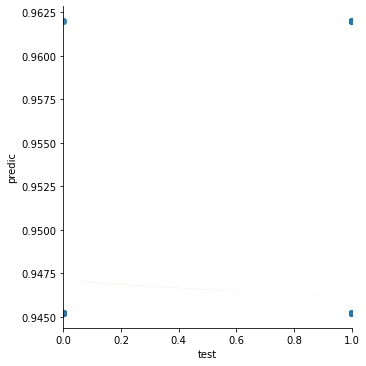

In [43]:
sns.lmplot(x='test', y='predic', data=df_sum, ci=True,
          scatter_kws={'alpha' : 0.5},
          line_kws={'color': 'red'});

## deep learning

In [5]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Conv1D,MaxPooling1D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from keras.utils import np_utils

In [90]:
X_train1 = X_train.reshape(-1,1)
X_test1 = X_test.reshape(-1,1)
y_train1 = y_train.reshape(-1,1)
y_test1 = y_test.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)
y_train = np.expand_dims(y_train, 2)
y_test = np.expand_dims(y_test, 2)

model = Sequential()
model.add(Conv1D(16, 5, activation = 'relu', input_shape = (64,1)))

NameError: name 'y' is not defined

In [129]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 64, 64, 1) (80, 64, 64, 1) (320, 3, 1) (80, 3, 1)


In [37]:
new_x = np.empty((len(X_train),64,64,1))
for i in range(len(X_train)):
    new_x[i] = X_train[i]
print(new_x.shape)
new_y = np.empty((len(y_train),64,64,1))
for i in range(len(y_train)):
    new_y[i] = y_train[i]
new_xt = np.empty((len(X_test),64,64,1))
for i in range(len(X_test)):
    new_xt[i] = X_test[i]
new_yt = np.empty((len(y_test),64,64,1))
for i in range(len(y_test)):
    new_yt[i] = y_test[i]
print(new_y.shape)

(1638, 64, 64, 1)
(1638, 64, 64, 1)


In [55]:
array_X = np.zeros((1,64,64,3))
for i in range(0,len(array_X)):
    array_X[i] = X_train[i]
array_y = np.zeros((1,64,64,3))
for i in range(0,len(array_y)):
    array_y[i] = X_train[i]

In [17]:
n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform', input_shape=(n_features,)))
model.add(Dense(400))
model.add(Dense(300))
model.add(Dense(200))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(40))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
opt = Adam(lr=0.001)
model.compile(loss='mse', #loss คือการคิดค่า loss ในการ train ว่าจะใช้วิธีไหน
             optimizer=opt,           #optimizer adam เป็นตัวที่ไว้ปรับ weight ตอน train 
             metrics=['accuracy'])

In [68]:
#Resnet50
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras_applications import resnet50
from keras import optimizers
model = Sequential()
pretained_model = tf.keras.applications.ResNet50(input_shape=(64,64,3))
for layer in pretained_model.layers:
    layer.trainable=False
model.add(pretained_model)
model.add(Flatten())
model.add(Dense(412,activation='relu'))
model.add(Dense(5,activation='softmax'))

ValueError: When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (224, 224, 3).

In [18]:
#CNN
model = Sequential()
model.add(Conv2D(16,5, activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='relu'))

In [19]:
opt = Adam(lr=0.001)
model.compile(loss='mse', #loss คือการคิดค่า loss ในการ train ว่าจะใช้วิธีไหน
             optimizer=opt,           #optimizer adam เป็นตัวที่ไว้ปรับ weight ตอน train 
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 60, 16)            96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 16)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                10272     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 10,467
Trainable params: 10,467
Non-trainable params: 0
__________________________________________________

In [20]:
history = model.fit(X_train,y_train, batch_size = 20, epochs = 100,verbose=1)

Epoch 1/100


ValueError: in user code:

    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [20, 64, 64]


In [37]:
data = np.array([0, 0, 0, 1, 1, 0, 0, 0])
data = data.reshape(1, 8, 1)
print(data.shape)

(1, 8, 1)


In [26]:
value = model.predict(new_xt)

In [27]:
#train deep modified 
print("R2 score", r2_score(y_test,value))
print("MSE",mean_squared_error(y_test,value))

NameError: name 'r2_score' is not defined

In [28]:
from sklearn.metrics import r2_score,mean_squared_error
#train deep modified 1
print("R2 score", r2_score(y_test,value))
print("MSE",mean_squared_error(y_test,value))

ValueError: y_true and y_pred have different number of output (1!=10)

In [30]:
#train deep modified 2
print("R2 score", r2_score(new_yt,value))
print("MSE",mean_squared_error(new_yt,value))

ValueError: Found array with dim 4. Estimator expected <= 2.

In [ ]:
print("MSE :",mean_squared_error(y_true,y_pred))
print("RMSE :", sqrt(mean_squared_error(y_true,y_pred)))